In [47]:
# We now map shootings and examine their geographic correlation with border crossings
crossing <- read.csv('/Users/alessia/Desktop/border_crossing/Border_Crossing_Entry_Data.csv')
library(maps)
library(dplyr)
library(ggplot2)
MainStates <- map_data("state")
shootings <- read.csv('/Users/alessia/Desktop/border_crossing/shooting.csv')
suppressPackageStartupMessages(library(dplyr))

In [2]:
# view shooting dataset summary
summary(shootings)

    Case..          Shooter.Last.Name  Shooter.First.Name  Full.Date        
 Length:198         Length:198         Length:198         Length:198        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 Day.of.Week             Day            Month             Year     
 Length:198         Min.   : 1.00   Min.   : 1.000   Min.   :1966  
 Class :character   1st Qu.: 7.00   1st Qu.: 3.000   1st Qu.:1993  
 Mode  :character   Median :15.00   Median : 7.000   Median :2006  
                    Mean   :14.81   Mean   : 6.574   Mean   :2003  
                    3rd Qu.:22.00   3rd Qu.:

In [3]:
# view first rows
head(shootings)

,Case..,Shooter.Last.Name,Shooter.First.Name,Full.Date,Day.of.Week,Day,Month,Year,Street.Number,Street.Name,⋯,Interest.in.Firearms,Firearm.Proficiency,Total.Firearms.Brought.to.the.Scene,Other.Weapons.or.Gear,Specify.Other.Weapons.or.Gear,On.Scene.Outcome,Who.Killed.Shooter.On.Scene,Attempt.to.Flee,Insanity.Defense,Criminal.Sentence
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,Case #,Perpetrator Name,,Date,,NA,NA,NA,Location,,⋯,Weapons,NA,NA,NA,,Resolution of Case,NA,NA,NA,NA
2,1,Whitman,Charles,8/1/1966,Monday,1,8,1966,110,Inner Campus Dr,⋯,1,3,7,1,"hatchet, hammer, knives, wrench, ropes, water, gasoline, matches, food and camping supplies",1,2,0,2,0
3,2,Smith,Robert,11/12/1966,Saturday,12,11,1966,Rose-Mar College of Beauty,N Rose,⋯,0,1,1,1,"knife, nylon cord",2,0,0,1,1
4,3,Held,Leo,10/23/1967,Monday,23,10,1967,599,S Highland St,⋯,1,3,2,1,holster,1,2,0,2,0
5,4,Pearson,Eric,3/16/1968,Saturday,16,3,1968,11703,Lake Rd,⋯,0,0,1,0,NA,2,0,0,0,3
6,5,Lambright,Donald,4/5/1969,Saturday,5,4,1969,,I-76,⋯,0,3,2,0,NA,0,1,0,2,0


In [4]:
# preprocess shootings dataset
shootings <- shootings[c(-1),]

In [53]:
# convert shootings to numeric type
shootings$Number.Killed <- as.numeric(shootings$Number.Killed)
shootings <- shootings %>% filter(Longitude > -140)
crossing <- crossing %>% filter(Latitude < 50)

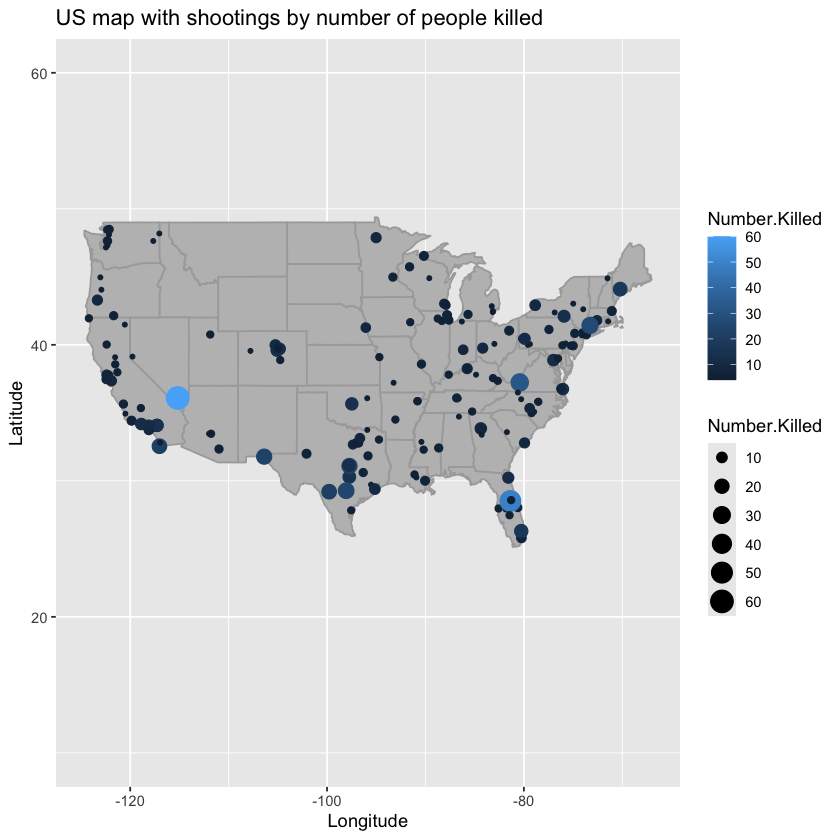

In [57]:
# plot shootings on the US map
ggplot() +
  geom_polygon(data = MainStates, aes(x = long, y = lat, group = group), color = 'darkgrey', fill = 'grey') +
  geom_point(data = shootings, aes(x = Longitude, y = Latitude, color = Number.Killed, size = Number.Killed)) +
  guides(fill = 'none') +
  ylim(10, 60) +
  labs(x = 'Longitude', y = 'Latitude') +
  ggtitle('US map with shootings by number of people killed')


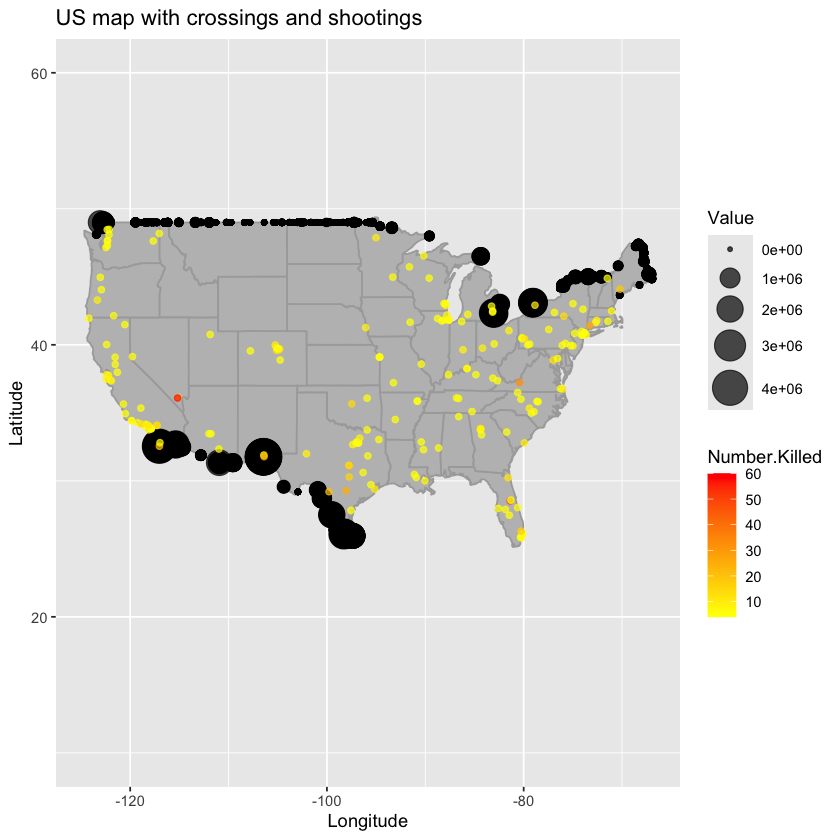

In [60]:
# visualize map with shootings and crossings
ggplot() +
  geom_polygon(data = MainStates, aes(x = long, y = lat, group = group), color = 'darkgrey', fill = 'grey') +
  geom_point(data = crossing, aes(x = Longitude, y = Latitude, size = Value), alpha = 0.7) +
  geom_point(data = shootings, aes(x = Longitude, y = Latitude, color = Number.Killed), alpha = 0.7) +
  guides(fill = 'none') +
  scale_color_gradient(low = "yellow", high = "red") +
  scale_size_continuous(range = c(1, 10)) +
  ylim(10, 60) +
  labs(x = 'Longitude', y = 'Latitude') +
  ggtitle('US map with crossings and shootings')



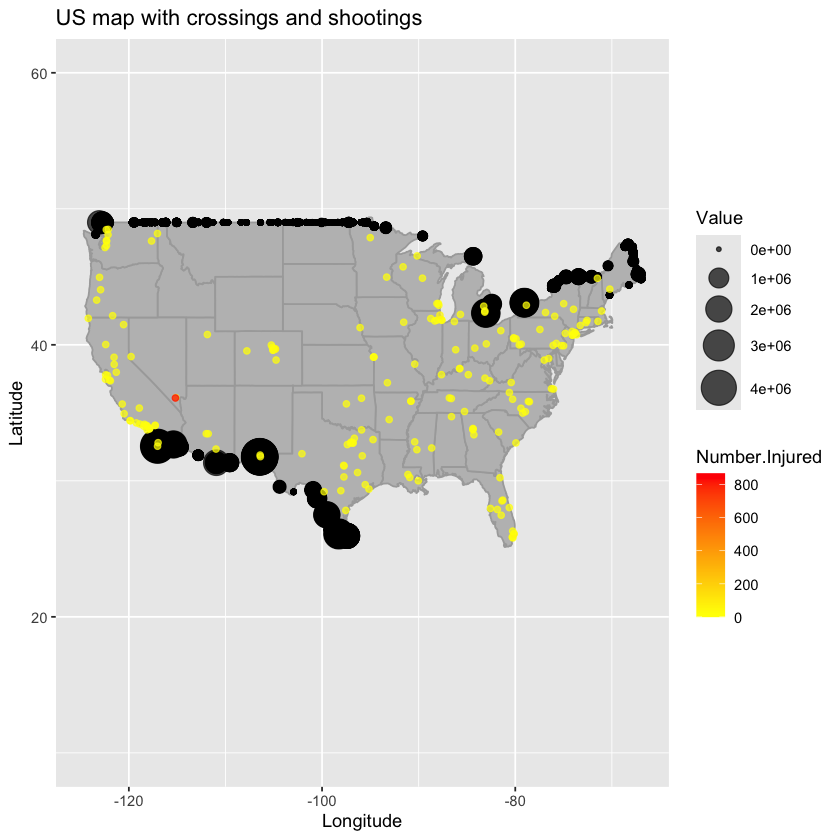

In [61]:
# map with number of injured people and crossings
ggplot() +
  geom_polygon(data = MainStates, aes(x = long, y = lat, group = group), color = 'darkgrey', fill = 'grey') +
  geom_point(data = crossing, aes(x = Longitude, y = Latitude, size = Value), alpha = 0.7) +
  geom_point(data = shootings, aes(x = Longitude, y = Latitude, color = Number.Injured), alpha = 0.7) +
  guides(fill = 'none') +
  scale_color_gradient(low = "yellow", high = "red") +
  scale_size_continuous(range = c(1, 10)) +
  ylim(10, 60) +
  labs(x = 'Longitude', y = 'Latitude') +
  ggtitle('US map with crossings and shootings')

We see that there is no particularly evident correlation between value of crossings and number of people killed or injured in mass shootings, or number of mass shootings overall.

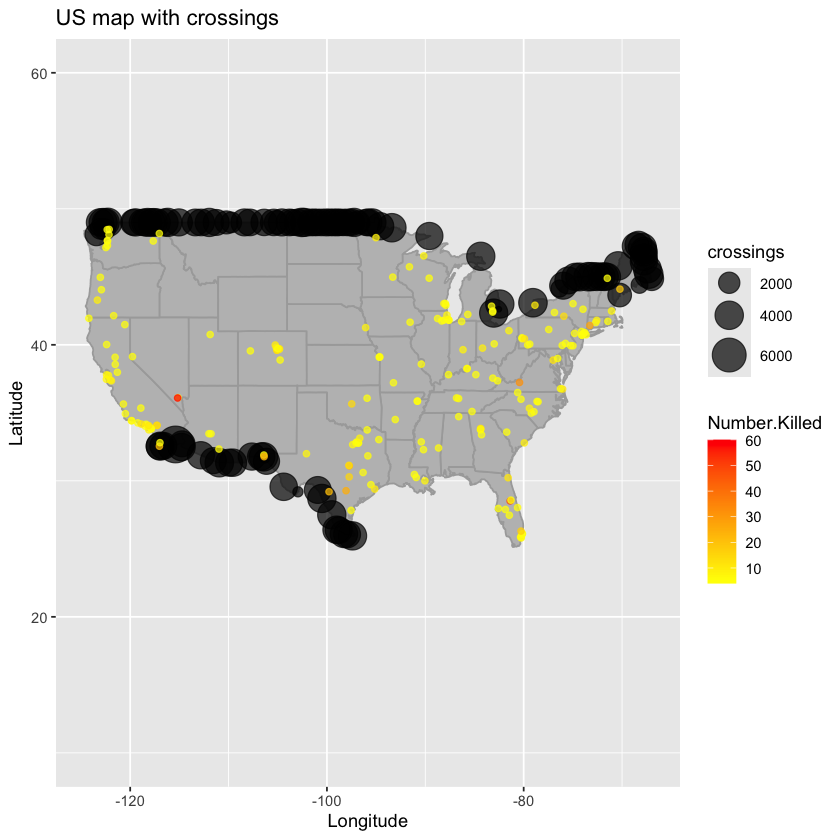

In [64]:
# check correlation with number of crossings
measure_by_position <- crossing %>%
  group_by(Longitude, Latitude) %>%
  summarise(crossings = n(), .groups = 'drop')

ggplot() +
  geom_polygon(data = MainStates, aes(x=long, y=lat, group=group), color = 'darkgrey', fill = 'grey') +
  geom_point(data=measure_by_position, aes(x=Longitude, y=Latitude, size = crossings), alpha = 0.7) +
    geom_point(data = shootings, aes(x = Longitude, y = Latitude, color = Number.Killed), alpha = 0.7) +
    guides(fill = 'none') +
    scale_color_gradient(low = "yellow", high = "red") +
    scale_size_continuous(range = c(1, 10)) +
    ylim(10, 60) +
    labs(x = 'Longitude', y = 'Latitude') +
    ggtitle('US map with crossings')

The same is true for the number of crossings and the number and severity of mass shootings.